https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/kaart-van-100-meter-bij-100-meter-met-statistieken

download: "Statistische gegevens per vierkant 2018 (Shape)" from https://www.cbs.nl/-/media/cbs/dossiers/nederland-regionaal/vierkanten/2020-cbs_vk100_2018_v2_shape.zip and unzip in current folder.

# import packages

In [1]:
# https://pypi.org/project/rijksdriehoek/
# !pip install rijksdriehoek
from rijksdriehoek import rijksdriehoek
import pandas as pd
from simpledbf import Dbf5
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

In [2]:
# rd = rijksdriehoek.Rijksdriehoek()
# print("Original coordinates in WGS’84: {},{}".format(str(52.3761973), str(4.8936216)))
# rd.from_wgs(52.3761973, 4.8936216)
# print("Rijksdriehoek: {},{}".format(str(rd.rd_x), str(rd.rd_y)))
# lat, lon = rd.to_wgs()
# print("WGS’84 coordinates converted from RD: {},{}".format(str(lat), str(lon)))

def WGS84toRD(North, East):
    """
    Convert WGS'84 coordinates to Rijksdriehoek x and y system per 100 meter
    """
    rd = rijksdriehoek.Rijksdriehoek()
    rd.from_wgs(North, East)
    return rd.rd_x/100, rd.rd_y/100

print(WGS84toRD(52.3676, 4.9041))

(1220.966250653319, 4867.446281807253)


# load data

In [3]:
dbf = Dbf5('CBS_VK100_2018_v2.dbf')
df = dbf.to_dataframe()
for col in df.columns:
    print(col, end=" ")

C28992R100
INWONER
MAN
VROUW
INW_014
INW_1524
INW_2544
INW_4564
INW_65PL
GEBOORTE
P_NL_ACHTG
P_WE_MIG_A
P_NW_MIG_A
AANTAL_HH
TOTHH_EENP
TOTHH_MPZK
HH_EENOUD
HH_TWEEOUD
GEM_HH_GR
WONING
WONVOOR45
WON_4564
WON_6574
WON_7584
WON_8594
WON_9504
WON_0514
WON_1524
WON_MRGEZ
P_HUURWON
P_KOOPWON
WON_HCORP
WON_NBEW
WOZWONING
G_GAS_WON
G_ELEK_WON
UITKMINAOW
AFS_SUPERM
AV1_SUPERM
AV3_SUPERM
AV5_SUPERM
AFS_DAGLMD
AV1_DAGLMD
AV3_DAGLMD
AV5_DAGLMD
AFS_WARENH
AV5_WARENH
AV10WARENH
AV20WARENH
AFS_CAFE
AV1_CAFE
AV3_CAFE
AV5_CAFE
AFS_CAFTAR
AV1_CAFTAR
AV3_CAFTAR
AV5_CAFTAR
AFS_HOTEL
AV5_HOTEL
AV10_HOTEL
AV20_HOTEL
AFS_RESTAU
AV1_RESTAU
AV3_RESTAU
AV5_RESTAU
AFS_BSO
AV1_BSO
AV3_BSO
AV5_BSO
AFS_KDV
AV1_KDV
AV3_KDV
AV5_KDV
AFS_BRANDW
AFS_OPRIT
AFS_TRNOVS
AFS_TREINS
AFS_ATTRAC
AV10ATTRAC
AV20ATTRAC
AV50ATTRAC
AFS_BIOS
AV5_BIOS
AV10_BIOS
AV20_BIOS
AFS_MUS
AV5_MUS
AV10_MUS
AV20_MUS
AFS_PODIUM
AV5_PODIUM
AV10PODIUM
AV20PODIUM
AFS_BIBLIO
AF_IJSBAAN
AFS_POP
AFS_SAUNA
AFS_ZONBNK
AFS_ZWEMB
AFS_ONDBAS
AV1_ONDBAS
AV3

In [4]:
x_lower = WGS84toRD(52.3676, 4.9041)[0] - 50
x_upper = WGS84toRD(52.3676, 4.9041)[0] + 50
y_lower = WGS84toRD(52.3676, 4.9041)[1] - 50
y_upper = WGS84toRD(52.3676, 4.9041)[1] + 50

data = df.loc[df["WOZWONING"] > 0]
coordinates = data["C28992R100"].tolist()
x = []
y = []
for coord in coordinates[:]:
    x.append(int(coord[1:5]))
    y.append(int(coord[6:11]))

data["x"] = x
data["y"] = y
data = data[["x", "y", "WOZWONING"]]
print(len(data), "original data points")
data = data.loc[(data["x"] > x_lower) & (data["x"] < x_upper)]
data = data.loc[(data["y"] > y_lower) & (data["y"] < y_upper)]
data.reset_index(drop=True, inplace=True)
print(len(data), "data points after cropping the desired area")
data

# plt.scatter(data["x"].tolist(), data["y"].tolist(), color="black", s=1)
# plt.show()

<ipython-input-4-c5d0652a98e9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["x"] = x
<ipython-input-4-c5d0652a98e9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["y"] = y


253750 original data points
4115 data points after cropping the desired area


,x,y,WOZWONING
0,1206,4917,223
1,1207,4917,193
2,1208,4917,203
3,1209,4917,247
4,1210,4917,198
...,...,...,...
4110,1264,4818,117
4111,1265,4818,111
4112,1266,4818,112
4113,1268,4818,160


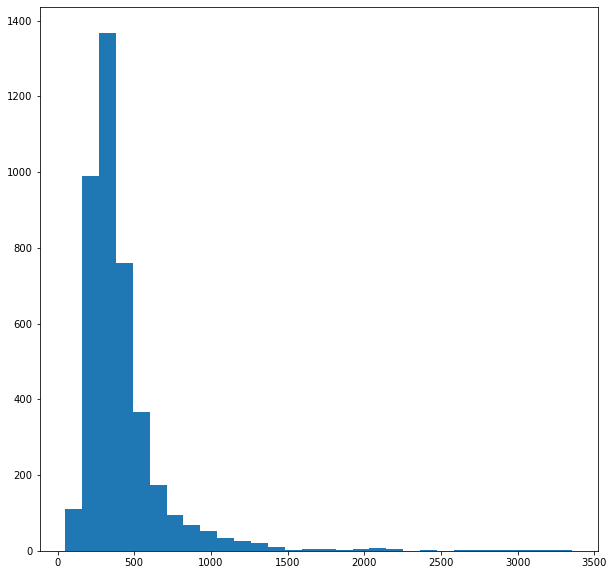

In [26]:
WOZ = data["WOZWONING"].tolist()
plt.hist(WOZ, bins=30)
plt.show()

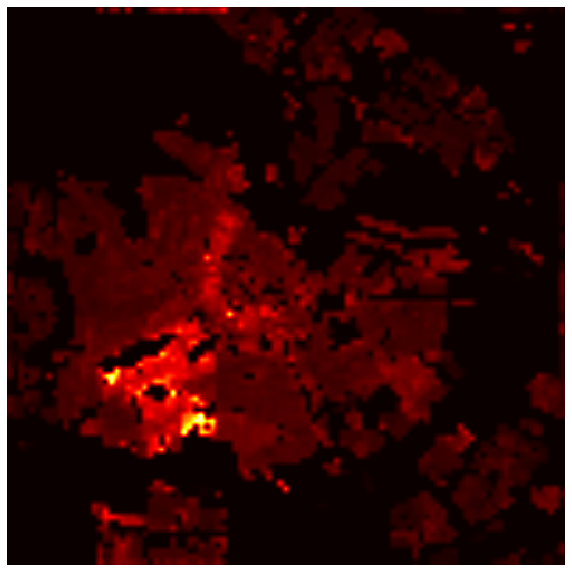

In [5]:
x_min = min(data["x"].tolist())
x_max = max(data["x"].tolist())
y_min = min(data["y"].tolist())
y_max = max(data["y"].tolist())
WOZ_min = min(data["WOZWONING"].tolist())

wealth = np.full((int(x_max-x_min), int(y_max-y_min)), 0)

for ind in data.index:
    wealth[data["x"][ind]-x_min-1][data["y"][ind]-y_min-1] = data["WOZWONING"][ind] - WOZ_min

wealth = np.rot90(wealth, 1)
wealth = resize(wealth, (500, 500), anti_aliasing = False)

plt.rcParams["figure.figsize"] = [10, 10]
plt.matshow(wealth, cmap="hot")
plt.axis("off")
plt.show()